В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [8]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
medical_df = pd.read_csv("drive/MyDrive/ML/medical-charges.csv") # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
#1.1
import numpy as np

X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values

X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

# формула методу найменших квадратів: theta = (X.T * X)^(-1) * X.T * y
theta_best = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)

# коеф моделі
theta_0, theta_1 = theta_best
print(f"Коефіцієнти моделі (МНК): Intercept = {theta_0}, Slope = {theta_1}")

y_pred_mnk = X_with_intercept.dot(theta_best)

rmse_mnk = np.sqrt(np.mean((y - y_pred_mnk) ** 2))
print(f"RMSE (МНК): {rmse_mnk}")


Коефіцієнти моделі (МНК): Intercept = -2091.4205565650805, Slope = 267.2489128311998
RMSE (МНК): 4662.505766636395


In [23]:
#2.1
import numpy as np
import matplotlib.pyplot as plt

def full_batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []
    for _ in range(epochs):

        y_pred = m * X[:, 0] + b

        error = y_pred - y

        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)

        m -= lr * m_gradient
        b -= lr * b_gradient

        errors.append(np.sqrt(np.mean(error**2)))

    return m, b, errors

X = non_smoker_df['age'].values.reshape(-1, 1)
y = non_smoker_df['charges'].values

learning_rates = [0.01, 0.001, 0.0001]
epochs = 1000
results = {}

for lr in learning_rates:
    m, b, errors = full_batch_gradient_descent(X, y, lr=lr, epochs=epochs)
    predictions = m * X[:, 0] + b
    rmse = np.sqrt(np.mean((y - predictions) ** 2))
    results[lr] = {'m': m, 'b': b, 'rmse': rmse, 'errors': errors}
    print(f"Learning Rate: {lr}")
    print(f"  Коефіцієнти: Slope = {m}, Intercept = {b}")
    print(f"  RMSE: {rmse}")



Learning Rate: 0.01
  Коефіцієнти: Slope = nan, Intercept = nan
  RMSE: nan
Learning Rate: 0.001
  Коефіцієнти: Slope = nan, Intercept = nan
  RMSE: nan
Learning Rate: 0.0001
  Коефіцієнти: Slope = 221.1045843794301, Intercept = -41.98126853149978
  RMSE: 4713.250582815521


<ipython-input-23-c2619e48efc8>:20: RuntimeWarning: overflow encountered in square
  errors.append(np.sqrt(np.mean(error**2)))
<ipython-input-23-c2619e48efc8>:17: RuntimeWarning: invalid value encountered in scalar subtract
  m -= lr * m_gradient


Складно сказати, який learning rate кращий бо без масштабування даних (я так розумію в цьому домашньому завданні його не можна застосувати), мені не показує rmse для всіх learning rates, але з standard scaler виходило 0.01

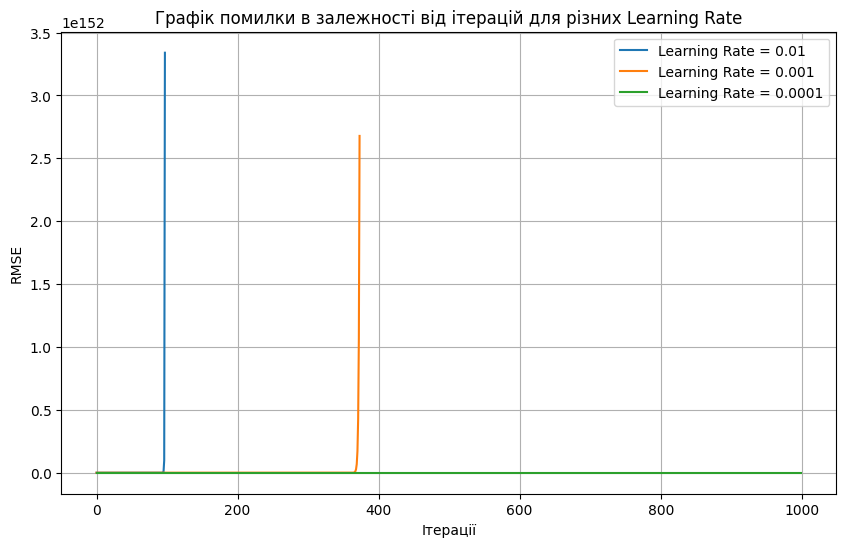

In [24]:
# графік помилки для кожного learning_rate
plt.figure(figsize=(10, 6))

for lr, result in results.items():
    plt.plot(result['errors'], label=f'Learning Rate = {lr}')

plt.xlabel('Ітерації')
plt.ylabel('RMSE')
plt.title('Графік помилки в залежності від ітерацій для різних Learning Rate')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
#3.1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = non_smoker_df['age'].to_frame()
y = non_smoker_df['charges']

model = LinearRegression()
model.fit(X, y)

# коеф
theta_0_sk = model.intercept_
theta_1_sk = model.coef_[0]
print(f"Коефіцієнти моделі (Scikit-Learn): Intercept = {theta_0_sk}, Slope = {theta_1_sk}")

y_pred_sk = model.predict(X)

rmse_sk = np.sqrt(mean_squared_error(y, y_pred_sk))
print(f"RMSE (Scikit-Learn): {rmse_sk}")


Коефіцієнти моделі (Scikit-Learn): Intercept = -2091.4205565650864, Slope = 267.2489128311997
RMSE (Scikit-Learn): 4662.505766636395


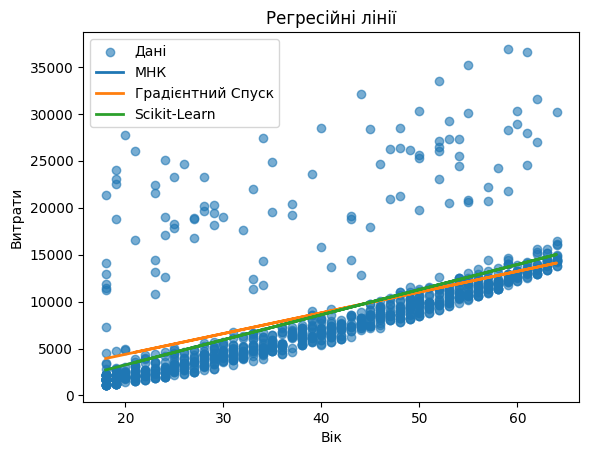

In [30]:
import matplotlib.pyplot as plt

# Графік даних і ліній
plt.scatter(non_smoker_df['age'], non_smoker_df['charges'], label="Дані", alpha=0.6)
plt.plot(non_smoker_df['age'], y_pred_mnk, label="МНК", linewidth=2)
plt.plot(non_smoker_df['age'], y_pred_gd, label="Градієнтний Спуск", linewidth=2)
plt.plot(non_smoker_df['age'], y_pred_sk, label="Scikit-Learn", linewidth=2)

plt.xlabel("Вік")
plt.ylabel("Витрати")
plt.legend()
plt.title("Регресійні лінії")
plt.show()


**Висновок**

1. Усі три методи (МНК, градієнтний спуск і Scikit-Learn) дають подібні результати. Лінії, знайдені кожним із методів, дуже близькі одна до одної.

2. Є чіткий позитивний лінійний тренд  між віком і витратами: зі збільшенням віку витрати зростають. Це свідчить про те, що вік є значущим фактором для прогнозування витрат у цій вибірці.

3. На графіку видно, що дані мають великий розкид. Це мож означати, що лінійна регресія описує загальний тренд, але вона не враховує всі варіації даних (можливо, є інші фактори, які впливають на витрати).

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [31]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
X = smoker_df['age'].to_frame()
y = smoker_df['charges']

In [35]:
model = LinearRegression()
model.fit(X, y)

theta_0 = model.intercept_
theta_1 = model.coef_[0]
print(f"Коефіцієнти моделі: Intercept = {theta_0}, Slope = {theta_1}")

Коефіцієнти моделі: Intercept = 20294.128126915966, Slope = 305.2376021098288


In [36]:
y_pred = model.predict(X)

In [37]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 10711.00334810241
R^2: 0.13558924096084068


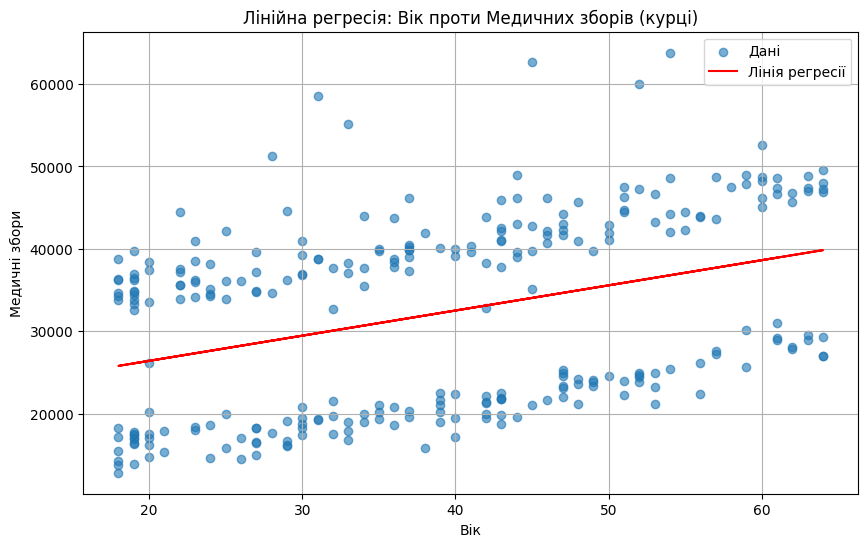

In [38]:
# Графік розсіювання з регресійною лінією
plt.figure(figsize=(10, 6))
plt.scatter(smoker_df['age'], smoker_df['charges'], label='Дані', alpha=0.6)
plt.plot(smoker_df['age'], y_pred, color='red', label='Лінія регресії')
plt.xlabel('Вік')
plt.ylabel('Медичні збори')
plt.title('Лінійна регресія: Вік проти Медичних зборів (курці)')
plt.legend()
plt.grid(True)
plt.show()

Висновок

Помітно, що дані розподілені не вздовж однієї прямої. Це означає, що лінійна регресія не може адекватно описати зв’язок між віком і медичними зборами.
Модель враховує лише вік, але інші змінні, такі як ІМТ (індекс маси тіла), стать, кількість дітей, можуть мати значний вплив на медичні збори. Також видно вликий розкид данх, тому варто додати інші змінні для побудови точнішої регресії, бо поточну модель я б не використовувала.
